In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir = '/content/drive/My Drive/YEAR 3/TERM 2/DATASCI/Healthsites'

In [4]:
# Read shapefile
ph = gpd.read_file(dir + '/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [6]:
# Read GeoJSON file
healthsites = gpd.read_file(dir + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [7]:
healthsites.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10405 entries, 0 to 10404
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   osm_id               10405 non-null  int64   
 1   osm_type             10405 non-null  object  
 2   completeness         10405 non-null  float64 
 3   is_in_health_zone    10405 non-null  object  
 4   amenity              10405 non-null  object  
 5   speciality           10405 non-null  object  
 6   addr_street          10405 non-null  object  
 7   operator             10405 non-null  object  
 8   water_source         10405 non-null  object  
 9   changeset_id         10365 non-null  float64 
 10  insurance            10405 non-null  object  
 11  staff_doctors        10405 non-null  object  
 12  contact_number       10405 non-null  object  
 13  uuid                 10405 non-null  object  
 14  electricity          10405 non-null  object  
 15  opening_hou

In [8]:
healthsites.addr_city.unique()

array(['', 'Tuguegarao', 'Alaminos', 'Pasig', 'Maasin', 'Cebu', 'Imus',
       'Abuyog', 'San Juan', 'Baao', 'General Trias', 'San Jose',
       'Consolacion', 'Amadeo', 'Davao City', 'Pulilan', 'Makati',
       'Quezon City', 'Angono', 'Iligan City', 'Gumaca', 'Baguio',
       'Bacolod', 'San Pablo', 'Bato', 'Daet', 'Cainta', 'Tanza',
       'Los Baños', 'Trece Martires', 'Marikina', 'Mandaluyong',
       'Muntinlupa', 'Dasmariñas', 'Mandaue City', 'Bacnotan', 'Taytay',
       'Manila', 'Jamindan', 'Lapu-Lapu', 'Tagbilaran', 'Subic', 'Bogo',
       'Bacoor', 'Koronadal City', 'Laoag', 'Las Piñas', 'Tandag City',
       'Calamba', 'Moncada', 'Pagsanjan', 'Bued', 'Tacloban', 'Parañaque',
       'Dolores', 'Tayabas', 'Tabaco City', 'Koronadal', 'Taguig',
       'Mambajao', 'Mandaue', 'Tiaong', 'Balanga City', 'Las PiÃ±as',
       'Pasay', 'Valenzuela', 'Santa Rosa', 'Dagupan City', 'Las Pi単as',
       'Para単aque', 'Lake Sebu', 'Naga', 'Santa Cruz', 'Antipolo',
       'Sorsogon City', 'Ma

In [9]:
laguna_cities = ["Biñan", "Cabuyao", "Calamba", "San Pablo", "San Pedro", "Santa Rosa", "Santa Rosa City"]
cavite_cities = ["Bacoor", "Cavite", "Cavite City", "Dasmariñas", "Dasmarinas", "General Trias", "Imus", 
                 "Tagaytay", "Tagaytay City", "Trece Martires", "Trece Martires City"]

In [10]:
cala_healthsites = healthsites[healthsites.addr_city.isin(laguna_cities + cavite_cities)]
cala_ph = ph[ph.NAME_1.isin(["Laguna", "Cavite"])]

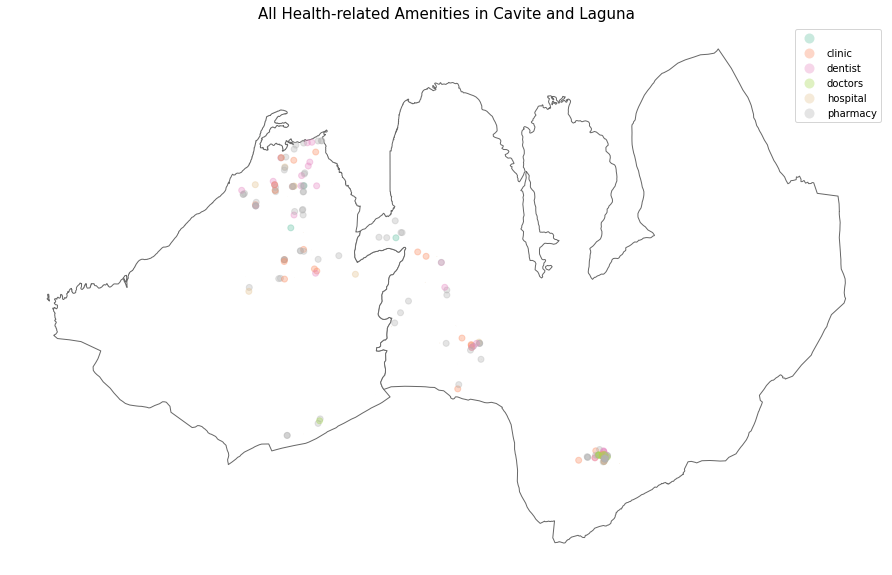

In [11]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites.plot(ax=ax, column="amenity", cmap="Set2", alpha=0.35, legend=True)
ax.set_title('All Health-related Amenities in Cavite and Laguna', fontsize=15)
ax.axis('off');

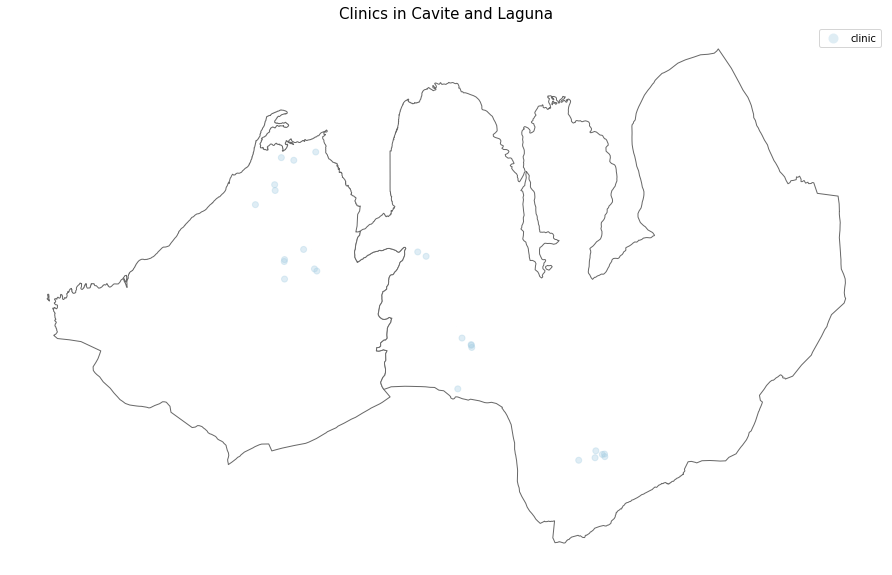

In [12]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "clinic"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Clinics in Cavite and Laguna', fontsize=15)
ax.axis('off');

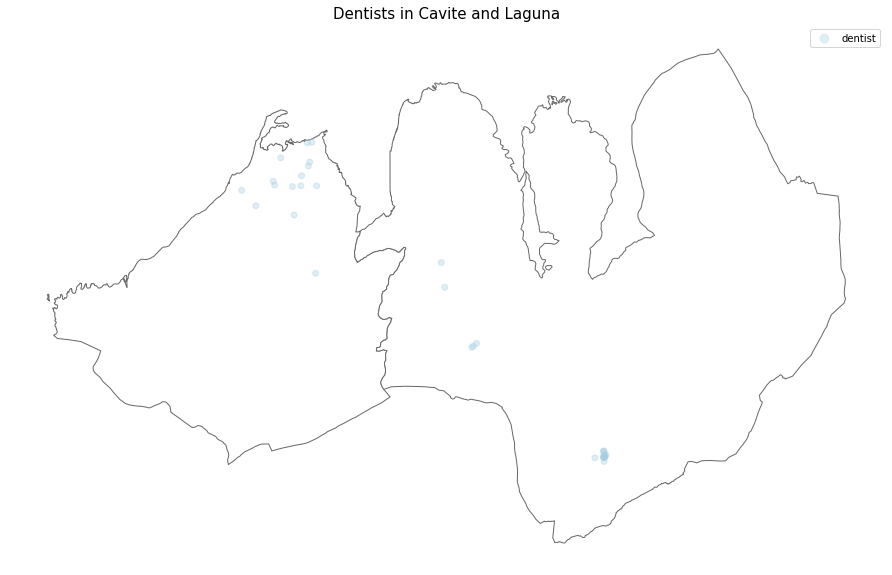

In [13]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "dentist"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Dentists in Cavite and Laguna', fontsize=15)
ax.axis('off');

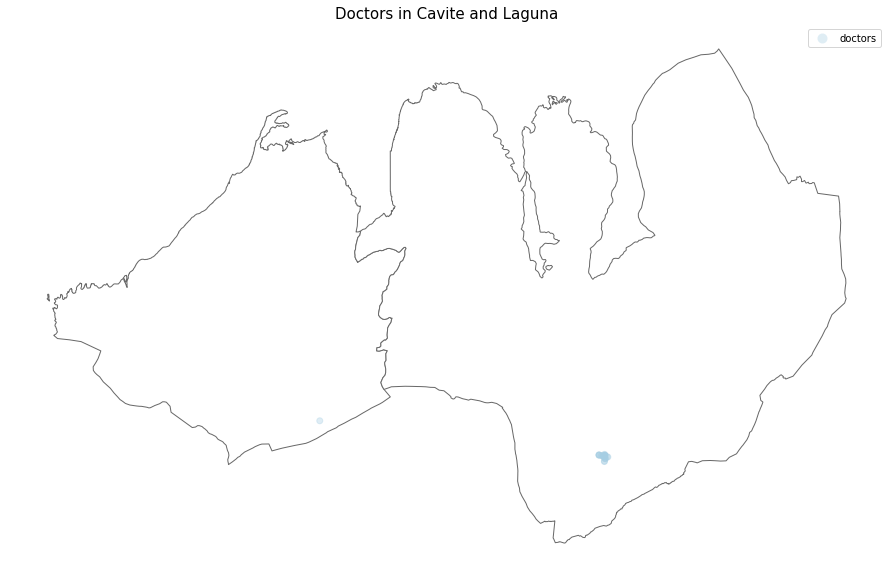

In [14]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "doctors"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Doctors in Cavite and Laguna', fontsize=15)
ax.axis('off');

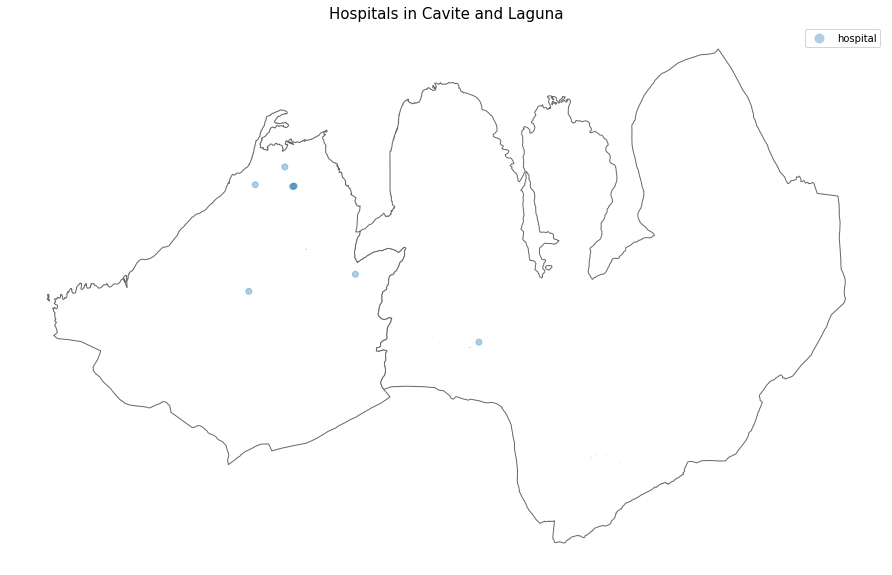

In [15]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "hospital"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Hospitals in Cavite and Laguna', fontsize=15)
ax.axis('off');

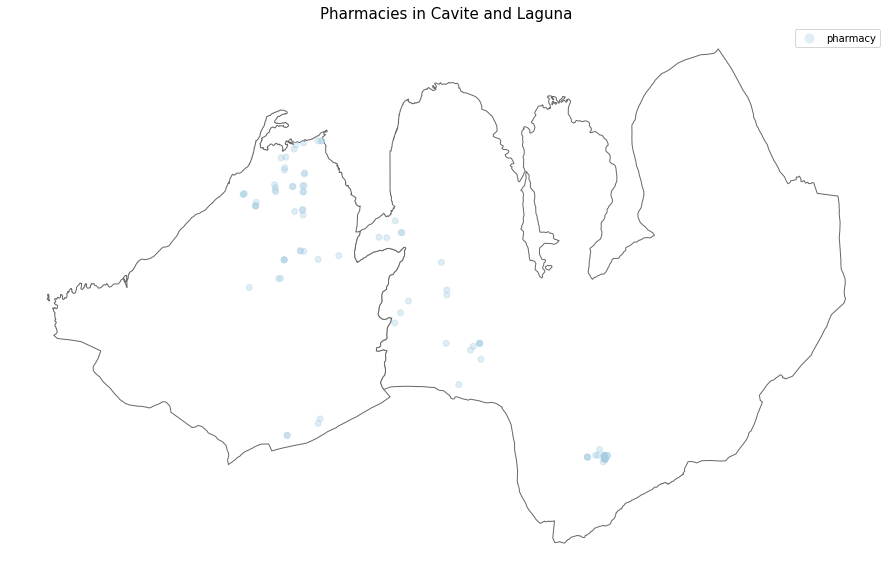

In [16]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "pharmacy"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Cavite and Laguna', fontsize=15)
ax.axis('off');